In [264]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2023-11-20
# @Filename: work.ipynb
# work.

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import math

import pandas as pd

In [265]:
class Cal_sample_statistic:
    """calculate sample statistic 
    
    1. Mean
    2. Geometric mean (can you?!)
    3. Median
    4. Mode
    5. Variance
    6. Standard deviation
    7. Skewness
    8. Kurtosis
    
    """

    def __init__(self, data: list):
        self.data = data
        self.num = len(data)

    def mean(self):
        # mean = sum / num
        sum = 0
        for i in self.data:
            sum = sum + i
        self.num = len(self.data)

        self.mean_val = sum / self.num
        
        return self.mean_val
    
    def geo_mean(self):
        # geo_mean = multip**(1/num)
        multip = 1
        for i in self.data:
            multip = multip*i

        self.geo_mean = multip**(1/self.num)

        return self.geo_mean
    
    def median(self):
        sortlist = sorted(self.data)
        flag = self.num%2
        half = int(self.num/2)
        print(flag)
        if flag == 0:
            fir_term = half - 1
            sec_term = half
            self.median = (sortlist[fir_term] + sortlist[sec_term]) / 2
        else:
            fir_term = (self.num - 1)/2
            print(fir_term)
            self.median = sortlist[fir_term]

        return self.median
    
    def mode(self):
        # mode
        count_dic = {}
        for i in self.data:
            index = 0
            for j in self.data:
                if i==j:
                    index += 1
                else:
                    pass
            
            count_dic[i] = index
        sort_dic = sorted(count_dic.items(), key=lambda x:(-x[1], x[0]))
        mode_tup = sort_dic[0]

        frequency = mode_tup[1]

        if frequency==1:
            self.mode="Not exist"
        else:
            self.mode = mode_tup[0]

        return self.mode


    def variance(self):
        # sum((val - self.mean)**2)/self.num
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**2
            sum = sum + comp
        
        self.varianceval = sum / self.num
        return self.varianceval

    def StandardDeviation(self):
        # variance**(1/2)
        val=self.variance()
        self.StandardDeviation_val = val**(1/2)
        return self.StandardDeviation_val

In [266]:
# Data Preparation

MCMC_data_set2 = "./MCMC_data_set_with_errorbars2.txt"

open_MCMC_data_set1 = open(MCMC_data_set2, "r")

df_MCMC_data_set2 = pd.read_csv(MCMC_data_set2, sep = ' ', names=["x", "y", "error"], header=None)
#df_MCMC_data_set1 = pd.DataFrame(open_MCMC_data_set1)
# x position y value y error

#df_MCMC_data_set1.plot(kind='line', x="x", y="y", title="MCMC_data_set1 data plot")
plt.show()

x = df_MCMC_data_set2["x"]
y = df_MCMC_data_set2["y"]
error = df_MCMC_data_set2["error"]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


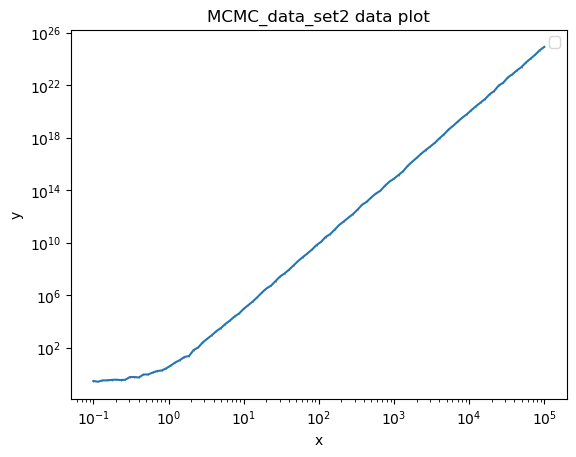

In [267]:
# Plot the true data and the best-fit quadratic model
plt.errorbar(x, y, yerr=error, ecolor="r", elinewidth=0.5)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('x')
plt.ylabel('y')
plt.title('MCMC_data_set2 data plot')
plt.legend()
plt.show()

In [268]:
import numpy as np
from scipy.stats import norm
import random

# Define the quadratic model
def quadratic_model(x, a, b, c, d, e, f):
    return a * x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

a_old, b_old, c_old, d_old, e_old, f_old = 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
old_pos = [a_old, b_old, c_old, d_old, e_old, f_old]

def chi_squared(y, model, sigma):
    sum = 0
    for i in range(len(y)):
        Chi_squared = (y[i]-model[i])**2/sigma[i]**2
        sum = sum + Chi_squared

    return sum

# Calculate the likelihood
old_likelihood = np.exp(-chi_squared(y, quadratic_model(x, *old_pos), error)/2)


In [269]:
# make new positions
record = []
new_position_list = []
new_pos = []
new_likelihood_list = []
chis = []
for i in range(1000):
    a_new, b_new, c_new = a_old + np.random.normal(0, 0.1), b_old+ np.random.normal(0, 0.1), c_old + np.random.normal(0, 0.1)
    d_new, e_new, f_new = d_old + np.random.normal(0,0.1), e_old+ np.random.normal(0,0.1), f_old + np.random.normal(0,0.1)
    new_pos = [a_new, b_new, c_new, d_new, e_new, f_new]
    
    # Calculate the likelihood
    chi = chi_squared(y, quadratic_model(x, *new_pos), error)
    new_likelihood = np.exp(-chi/2)
    
    if new_likelihood > old_likelihood:
        new_position_list.append(new_pos)
        chis.append(chi)
        new_position_list.append(new_pos)
        new_likelihood_list.append(new_likelihood)
        old_pos = new_pos
    elif new_likelihood < old_likelihood:
        rd = random.random()
        if rd < new_likelihood/old_likelihood:
            record.append(new_pos)
            chis.append(chi)
            new_position_list.append(new_pos)
            new_likelihood_list.append(new_likelihood)
            old_pos = new_pos
        else:
            record.append(old_pos)
            chis.append(chi)
            new_position_list.append(old_pos)
            new_likelihood_list.append(old_likelihood)
            old_pos = old_pos

237.6277647464058
[0.5473906043524357, 0.6034395087975788, 0.534941008829619, 0.4297845791456329, 0.5956436444147045, 0.22540630933824046]


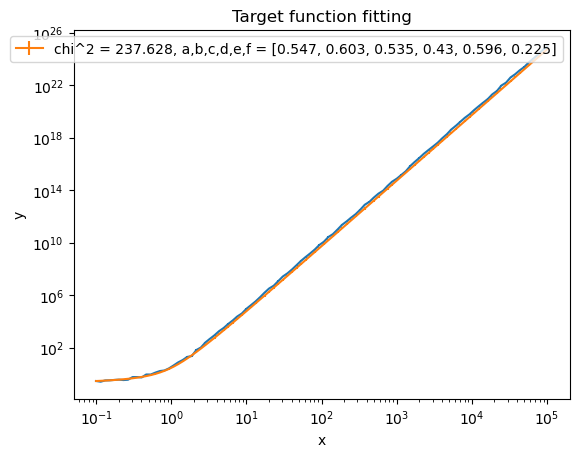

In [270]:
minimum_chi = min(chis)
print(minimum_chi)
index = chis.index(minimum_chi)
print(new_position_list[index])

chi_val = round(minimum_chi, 3)
lik_val=[]
for i in range(6):
    lik_val.append(round(new_position_list[index][i], 3))

plt.figure()
plt.errorbar(x, y, yerr=error)
plt.errorbar(x, quadratic_model(x, *new_position_list[index]), yerr=error, label=f"chi^2 = {chi_val}, a,b,c,d,e,f = {lik_val}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Target function fitting")
plt.show()


In [271]:
a_list = []
b_list = []
c_list = []
d_list = []
e_list = []
f_list = []

for i in range(len(new_position_list)):
    new_pos = new_position_list[i]
    a_list.append(new_pos[0])
    b_list.append(new_pos[1])
    c_list.append(new_pos[2])
    d_list.append(new_pos[3])
    e_list.append(new_pos[4])
    f_list.append(new_pos[5])

peak_a = new_position_list[index][0]
peak_b = new_position_list[index][1]
peak_c = new_position_list[index][2]
peak_d = new_position_list[index][3]
peak_e = new_position_list[index][4]
peak_f = new_position_list[index][5]

peak_a = round(peak_a,2)
peak_b = round(peak_b,2)
peak_c = round(peak_c,2)
peak_d = round(peak_d,2)
peak_e = round(peak_e,2)
peak_f = round(peak_f,2)

c:\Users\mming\Desktop\workspace\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mming\Desktop\workspace\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mming\Desktop\workspace\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mming\Desktop\workspace\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

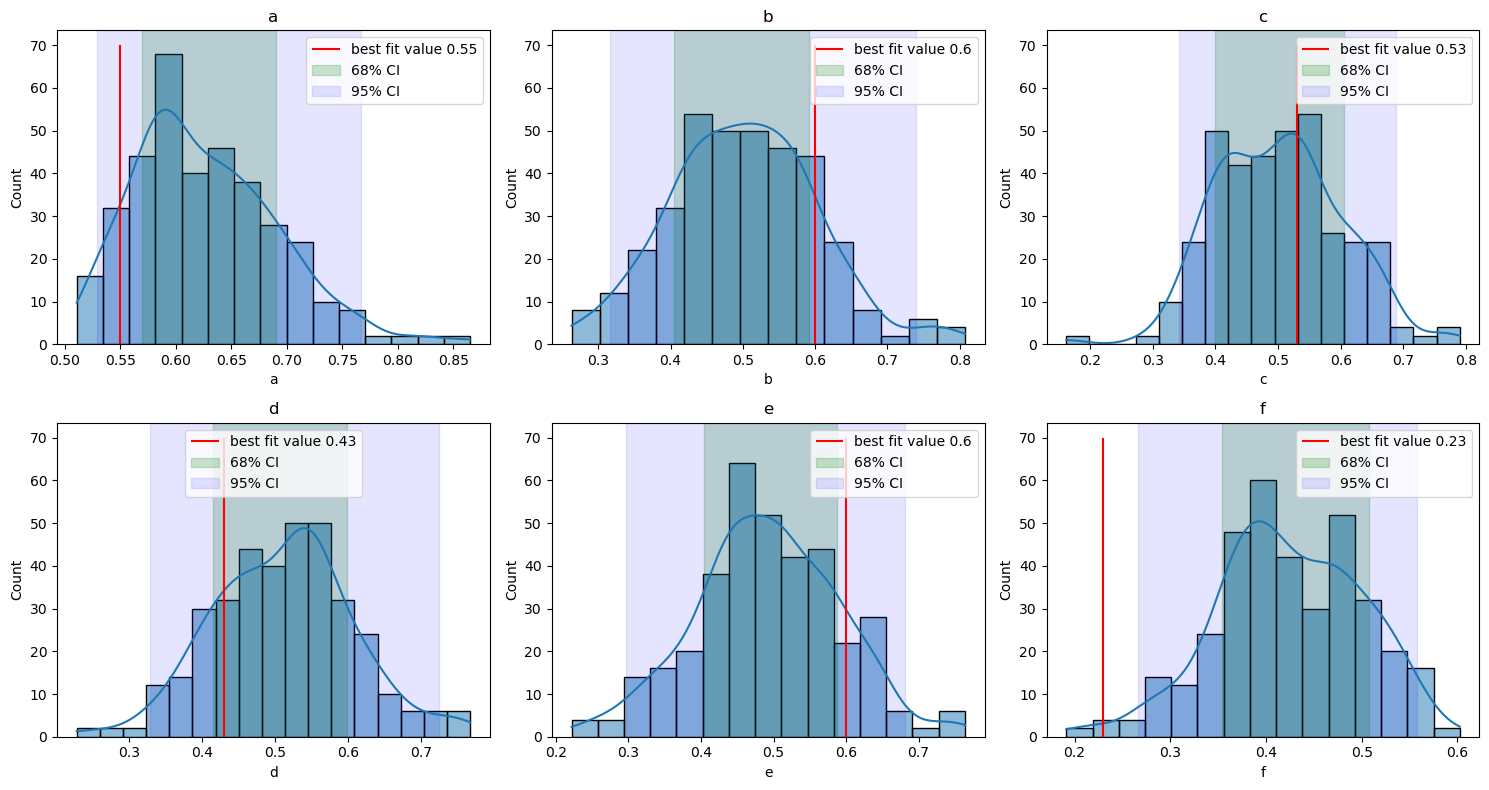

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import scoreatpercentile

a_1_cutted = a_list
b_1_cutted = b_list
c_1_cutted = c_list
d_1_cutted = d_list
e_1_cutted = e_list
f_1_cutted = f_list


# 예시 데이터 (실제 데이터에 맞게 수정 필요)
parameter_samples = {
    'a': a_1_cutted,
    'b': b_1_cutted,
    'c': c_1_cutted,
    'd': d_1_cutted,
    'e': e_1_cutted,
    'f': f_1_cutted,
    # 추가적인 매개변수들...
}


peak_list = [peak_a,peak_b,peak_c,peak_d,peak_e,peak_f]
# 히스토그램을 그리기 위한 subplot 설정
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# 각 매개변수에 대한 히스토그램 그리기
for ax, (param_name, samples), peak in zip(axes.flat, parameter_samples.items(), peak_list):
    sns.histplot(samples, kde=True, ax=ax)
    ax.vlines(peak, ymin=0, ymax=70, colors="r", label=f"best fit value {peak}")

    # 68% 신뢰 구간 표시
    conf_interval_68 = (scoreatpercentile(samples, 16), scoreatpercentile(samples, 84))
    ax.axvspan(conf_interval_68[0], conf_interval_68[1], color='g', alpha=0.2, label='68% CI')

    # 95% 신뢰 구간 표시
    conf_interval_95 = (scoreatpercentile(samples, 2.5), scoreatpercentile(samples, 97.5))
    ax.axvspan(conf_interval_95[0], conf_interval_95[1], color='b', alpha=0.1, label='95% CI')

    ax.set_title(f'{param_name}')
    ax.legend()
    ax.set_xlabel(param_name)

plt.tight_layout()
plt.show()

In [273]:
samples = a_list
sns.histplot(samples, kde=True, ax=ax)

# 68% 신뢰 구간 표시
conf_interval_68 = (scoreatpercentile(samples, 16), scoreatpercentile(samples, 84))
ax.axvspan(conf_interval_68[0], conf_interval_68[1], color='orange', alpha=0.2, label='68% CI')

# 95% 신뢰 구간 표시
conf_interval_95 = (scoreatpercentile(samples, 2.5), scoreatpercentile(samples, 97.5))
ax.axvspan(conf_interval_95[0], conf_interval_95[1], color='red', alpha=0.1, label='95% CI')

ax.set_title(f'1d marginalised posteriors of {param_name}')
ax.legend()
ax.set_xlabel(param_name)

c:\Users\mming\Desktop\workspace\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mming\Desktop\workspace\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 24.0, 'f')

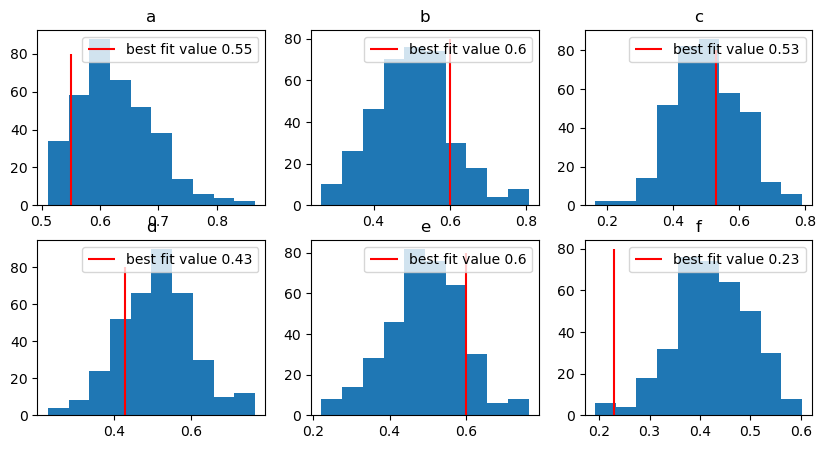

In [274]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
a_hist = plt.hist(a_list, bins=10)
plt.vlines(peak_a, ymin=0, ymax=80, colors="r", label=f"best fit value {peak_a}")
plt.title('a')
plt.legend()

plt.subplot(2,3,2)
plt.hist(b_list, bins=10)
plt.vlines(peak_b, ymin=0, ymax=80, colors="r", label=f"best fit value {peak_b}")
plt.title('b')
plt.legend()

plt.subplot(2,3,3)
plt.hist(c_list, bins=10)
plt.vlines(peak_c, ymin=0, ymax=80, colors="r", label=f"best fit value {peak_c}")
plt.title('c')
plt.legend()

plt.subplot(2,3,4)
plt.hist(d_list, bins=10)
plt.vlines(peak_d, ymin=0, ymax=80, colors="r", label=f"best fit value {peak_d}")
plt.title('d')
plt.legend()

plt.subplot(2,3,5)
plt.hist(e_list, bins=10)
plt.vlines(peak_e, ymin=0, ymax=80, colors="r", label=f"best fit value {peak_e}")
plt.title('e')
plt.legend()

plt.subplot(2,3,6)
plt.hist(f_list, bins=10)
plt.vlines(peak_f, ymin=0, ymax=80, colors="r", label=f"best fit value {peak_f}")
plt.title('f')
plt.legend()
plt.show()

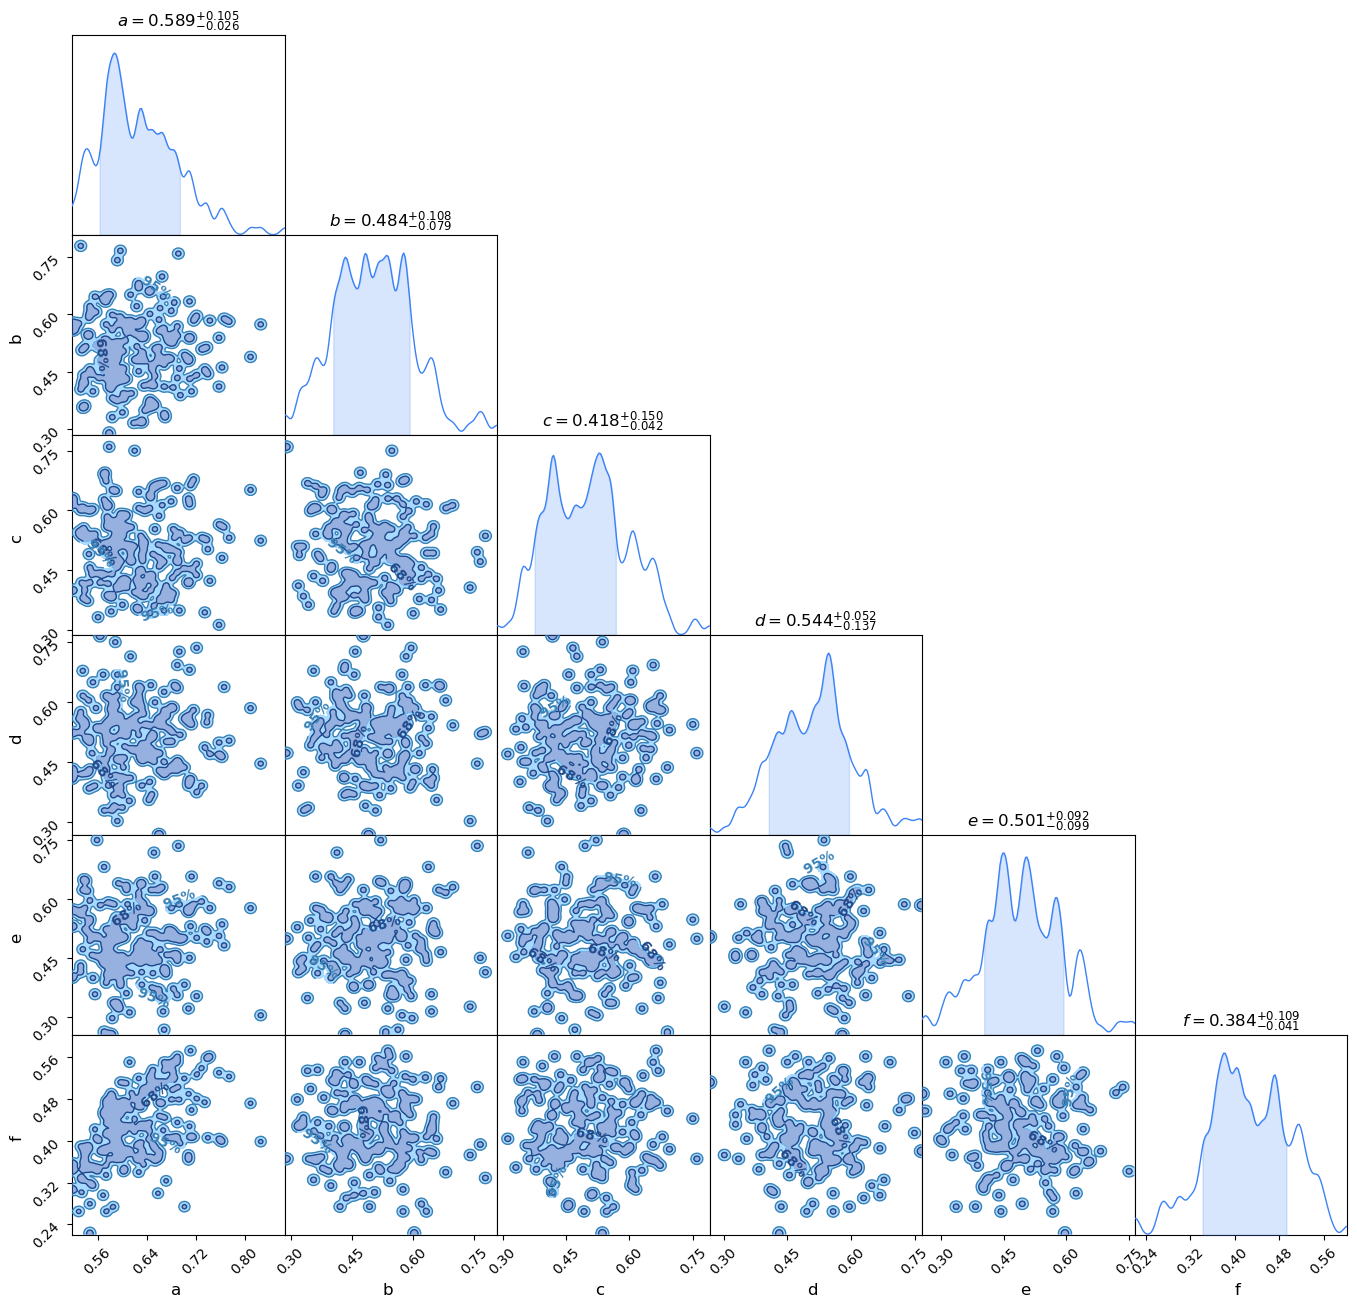

In [275]:
from chainconsumer import Chain, ChainConsumer, make_sample, PlotConfig

df = pd.DataFrame({"a":a_list, "b":b_list, "c":c_list, "d":d_list, "e":e_list, "f":f_list})
c = ChainConsumer()
c.add_chain(Chain(
    samples=df, 
    name="MCMC_data_set2", 
    show_contour_labels=True,))
fig = c.plotter.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


362


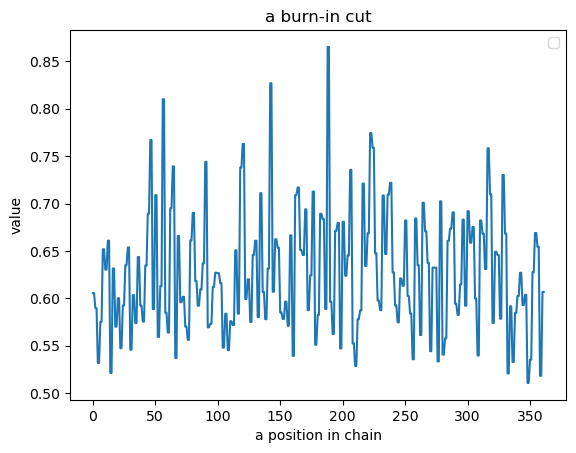

In [282]:
print(len(a_list))
plt.plot(a_list)
plt.title('a burn-in cut')
plt.xlabel("a position in chain")
plt.ylabel("value")
plt.legend()
plt.show()

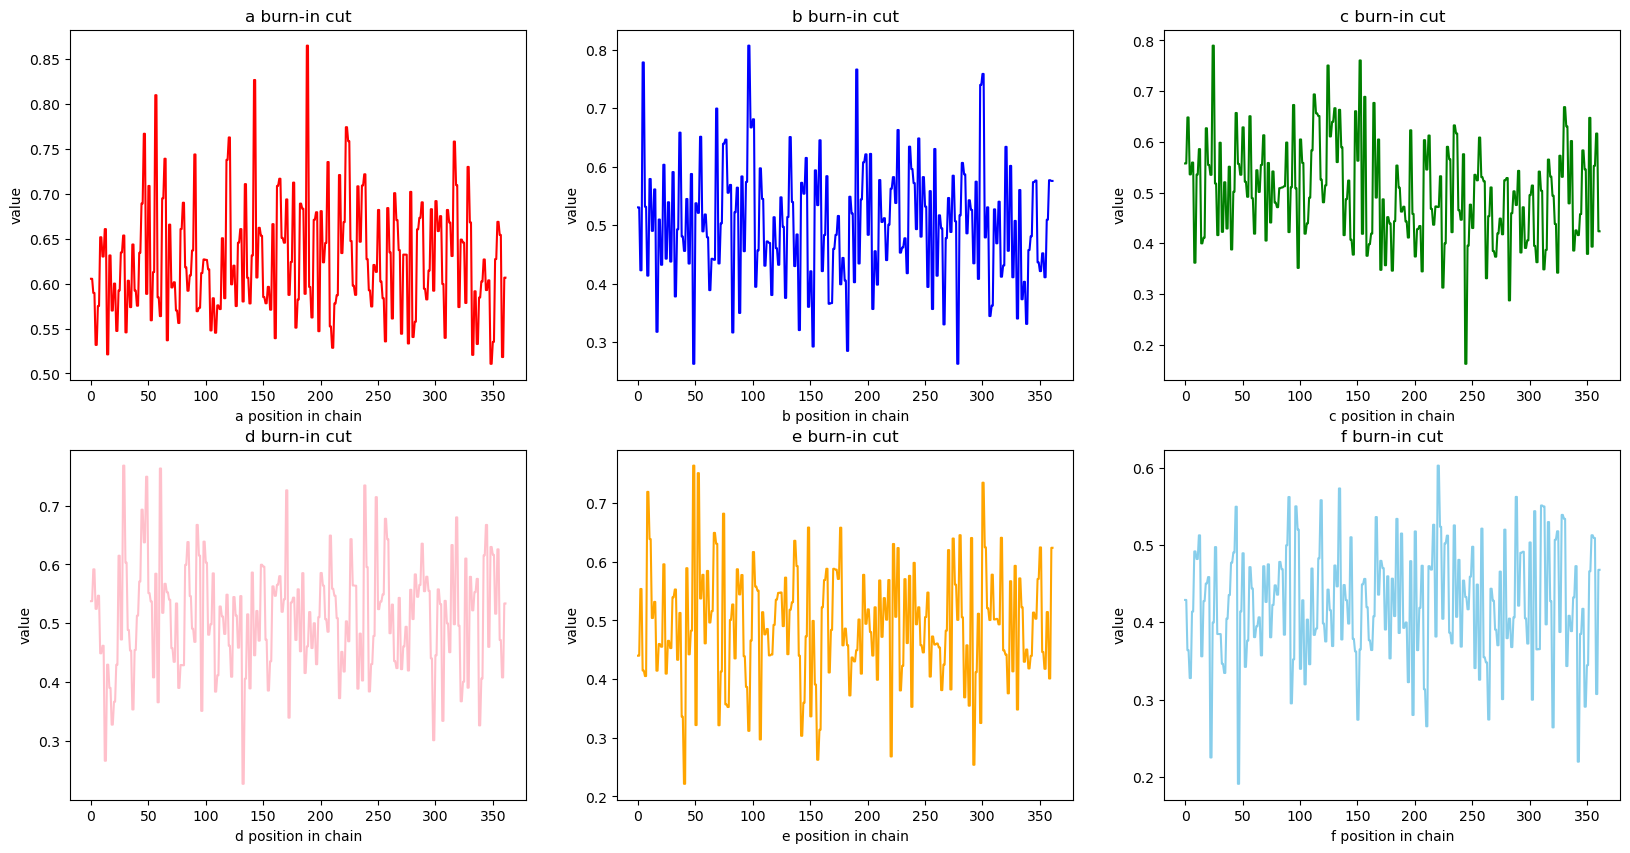

In [294]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.plot(a_list, color="r")
plt.title('a burn-in cut')
plt.xlabel("a position in chain")
plt.ylabel("value")

plt.subplot(2,3,2)
plt.plot(b_list, color="b")
plt.title('b burn-in cut')
plt.xlabel("b position in chain")
plt.ylabel("value")

plt.subplot(2,3,3)
plt.plot(c_list, color="g")
plt.title('c burn-in cut')
plt.xlabel("c position in chain")
plt.ylabel("value")

plt.subplot(2,3,4)
plt.plot(d_list, color="pink")
plt.title('d burn-in cut')
plt.xlabel("d position in chain")
plt.ylabel("value")

plt.subplot(2,3,5)
plt.plot(e_list, color="orange")
plt.title('e burn-in cut')
plt.xlabel("e position in chain")
plt.ylabel("value")

plt.subplot(2,3,6)
plt.plot(f_list, color="skyblue")
plt.title('f burn-in cut')
plt.xlabel("f position in chain")
plt.ylabel("value")

plt.show()

200.87048104368978
[0.6444161203834264, 0.48795794168427076, 0.44266707672075645, 0.46534753491163877, 0.39461514626057226, 0.39376499718615876]


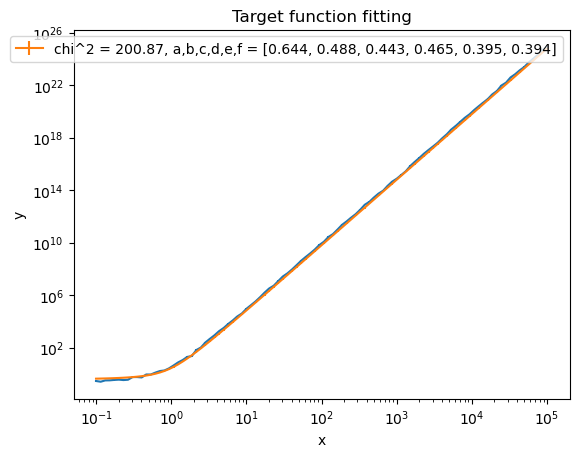

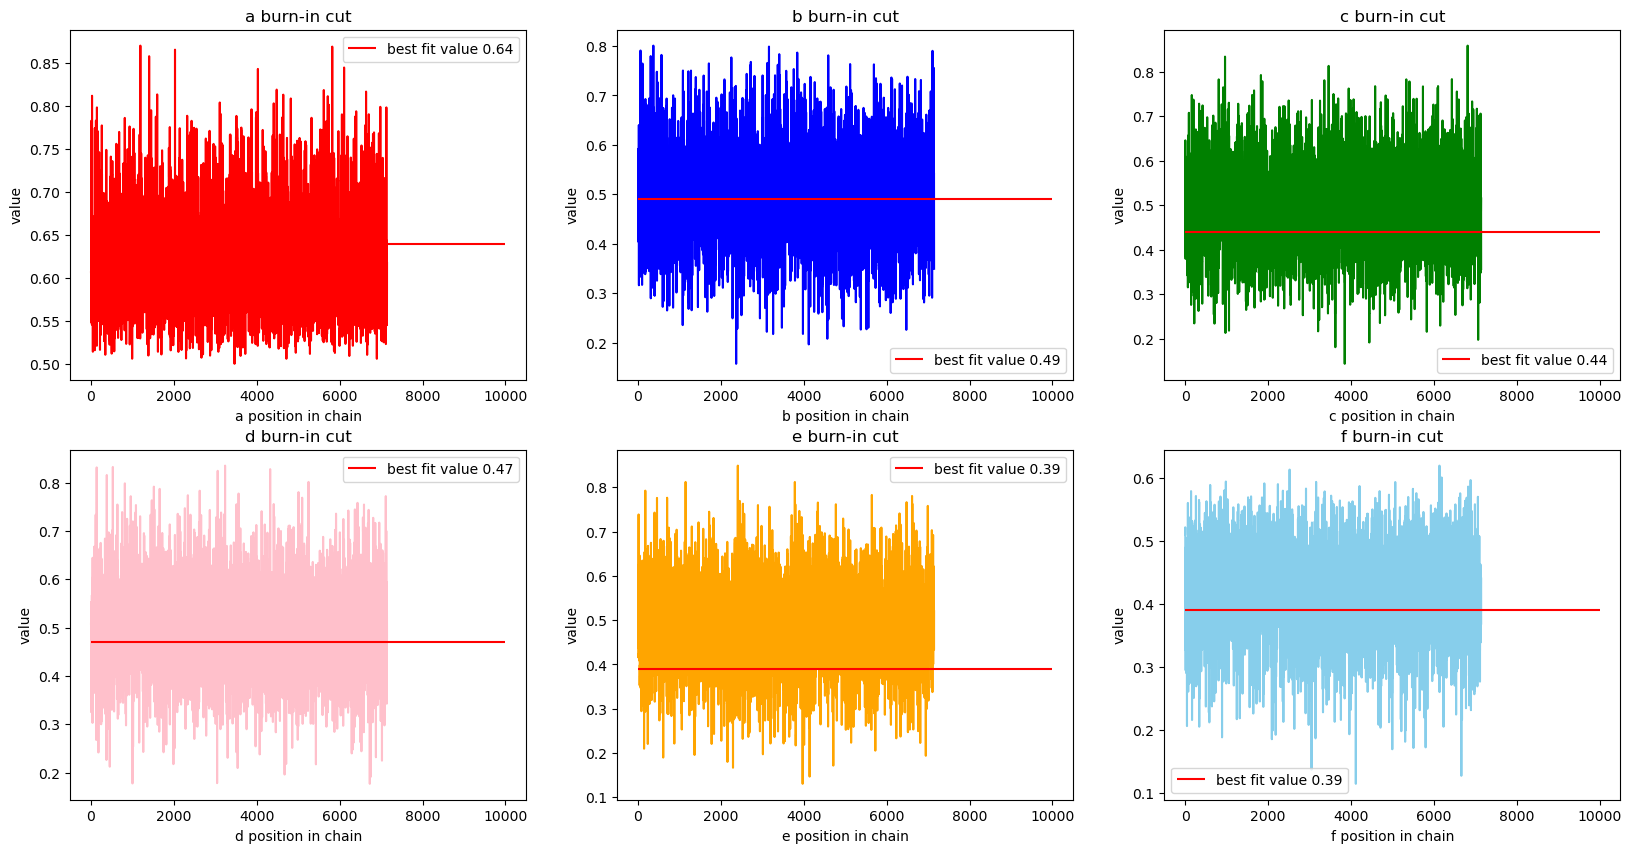

In [307]:
import numpy as np
from scipy.stats import norm
import random

# Define the quadratic model
def quadratic_model(x, a, b, c, d, e, f):
    return a * x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

a_old, b_old, c_old, d_old, e_old, f_old = 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
# 1,1,1,1,1,1
old_pos = [a_old, b_old, c_old, d_old, e_old, f_old]

def chi_squared(y, model, sigma):
    sum = 0
    for i in range(len(y)):
        Chi_squared = (y[i]-model[i])**2/sigma[i]**2
        sum = sum + Chi_squared

    return sum

# Calculate the likelihood
old_likelihood = np.exp(-chi_squared(y, quadratic_model(x, *old_pos), error)/2)

# make new positions
record = []
new_position_list = []
new_pos = []
new_likelihood_list = []
chis = []

for i in range(20000):
    a_new, b_new, c_new = a_old + np.random.normal(0, 0.1), b_old+ np.random.normal(0, 0.1), c_old + np.random.normal(0, 0.1)
    d_new, e_new, f_new = d_old + np.random.normal(0, 0.1), e_old+ np.random.normal(0, 0.1), f_old + np.random.normal(0, 0.1)
    new_pos = [a_new, b_new, c_new, d_new, e_new, f_new]
    
    # Calculate the likelihood
    chi = chi_squared(y, quadratic_model(x, *new_pos), error)
    new_likelihood = np.exp(-chi/2)
    
    if new_likelihood > old_likelihood:
        new_position_list.append(new_pos)
        chis.append(chi)
        new_position_list.append(new_pos)
        new_likelihood_list.append(new_likelihood)
        old_pos = new_pos
    elif new_likelihood < old_likelihood:
        rd = random.random()
        if rd < new_likelihood/old_likelihood:
            record.append(new_pos)
            chis.append(chi)
            new_position_list.append(new_pos)
            new_likelihood_list.append(new_likelihood)
            old_pos = new_pos
        else:
            record.append(old_pos)
            chis.append(chi)
            new_position_list.append(old_pos)
            new_likelihood_list.append(old_likelihood)
            old_pos = old_pos

minimum_chi = min(chis)
print(minimum_chi)
index = chis.index(minimum_chi)
print(new_position_list[index])

chi_val = round(minimum_chi, 3)
lik_val=[]
for i in range(6):
    lik_val.append(round(new_position_list[index][i], 3))

plt.figure()
plt.errorbar(x, y, yerr=error)
plt.errorbar(x, quadratic_model(x, *new_position_list[index]), yerr=error, label=f"chi^2 = {chi_val}, a,b,c,d,e,f = {lik_val}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Target function fitting")
plt.show()

a_list = []
b_list = []
c_list = []
d_list = []
e_list = []
f_list = []

for i in range(len(new_position_list)):
    new_pos = new_position_list[i]
    a_list.append(new_pos[0])
    b_list.append(new_pos[1])
    c_list.append(new_pos[2])
    d_list.append(new_pos[3])
    e_list.append(new_pos[4])
    f_list.append(new_pos[5])

peak_a = new_position_list[index][0]
peak_b = new_position_list[index][1]
peak_c = new_position_list[index][2]
peak_d = new_position_list[index][3]
peak_e = new_position_list[index][4]
peak_f = new_position_list[index][5]

peak_a = round(peak_a,2)
peak_b = round(peak_b,2)
peak_c = round(peak_c,2)
peak_d = round(peak_d,2)
peak_e = round(peak_e,2)
peak_f = round(peak_f,2)

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.plot(a_list, color="r")
plt.hlines(peak_a, xmin=0, xmax=8000, colors="r", label=f"best fit value {peak_a}")
plt.legend()
plt.title('a burn-in cut')
plt.xlabel("a position in chain")
plt.ylabel("value")

plt.subplot(2,3,2)
plt.plot(b_list, color="b")
plt.hlines(peak_b, xmin=0, xmax=8000, colors="r", label=f"best fit value {peak_b}")
plt.legend()
plt.title('b burn-in cut')
plt.xlabel("b position in chain")
plt.ylabel("value")

plt.subplot(2,3,3)
plt.plot(c_list, color="g")
plt.hlines(peak_c, xmin=0, xmax=8000, colors="r", label=f"best fit value {peak_c}")
plt.legend()
plt.title('c burn-in cut')
plt.xlabel("c position in chain")
plt.ylabel("value")

plt.subplot(2,3,4)
plt.plot(d_list, color="pink")
plt.hlines(peak_d, xmin=0, xmax=8000, colors="r", label=f"best fit value {peak_d}")
plt.legend()
plt.title('d burn-in cut')
plt.xlabel("d position in chain")
plt.ylabel("value")

plt.subplot(2,3,5)
plt.plot(e_list, color="orange")
plt.hlines(peak_e, xmin=0, xmax=8000, colors="r", label=f"best fit value {peak_e}")
plt.legend()
plt.title('e burn-in cut')
plt.xlabel("e position in chain")
plt.ylabel("value")

plt.subplot(2,3,6)
plt.plot(f_list, color="skyblue")
plt.hlines(peak_f, xmin=0, xmax=8000, colors="r", label=f"best fit value {peak_f}")
plt.legend()
plt.title('f burn-in cut')
plt.xlabel("f position in chain")
plt.ylabel("value")

plt.show()

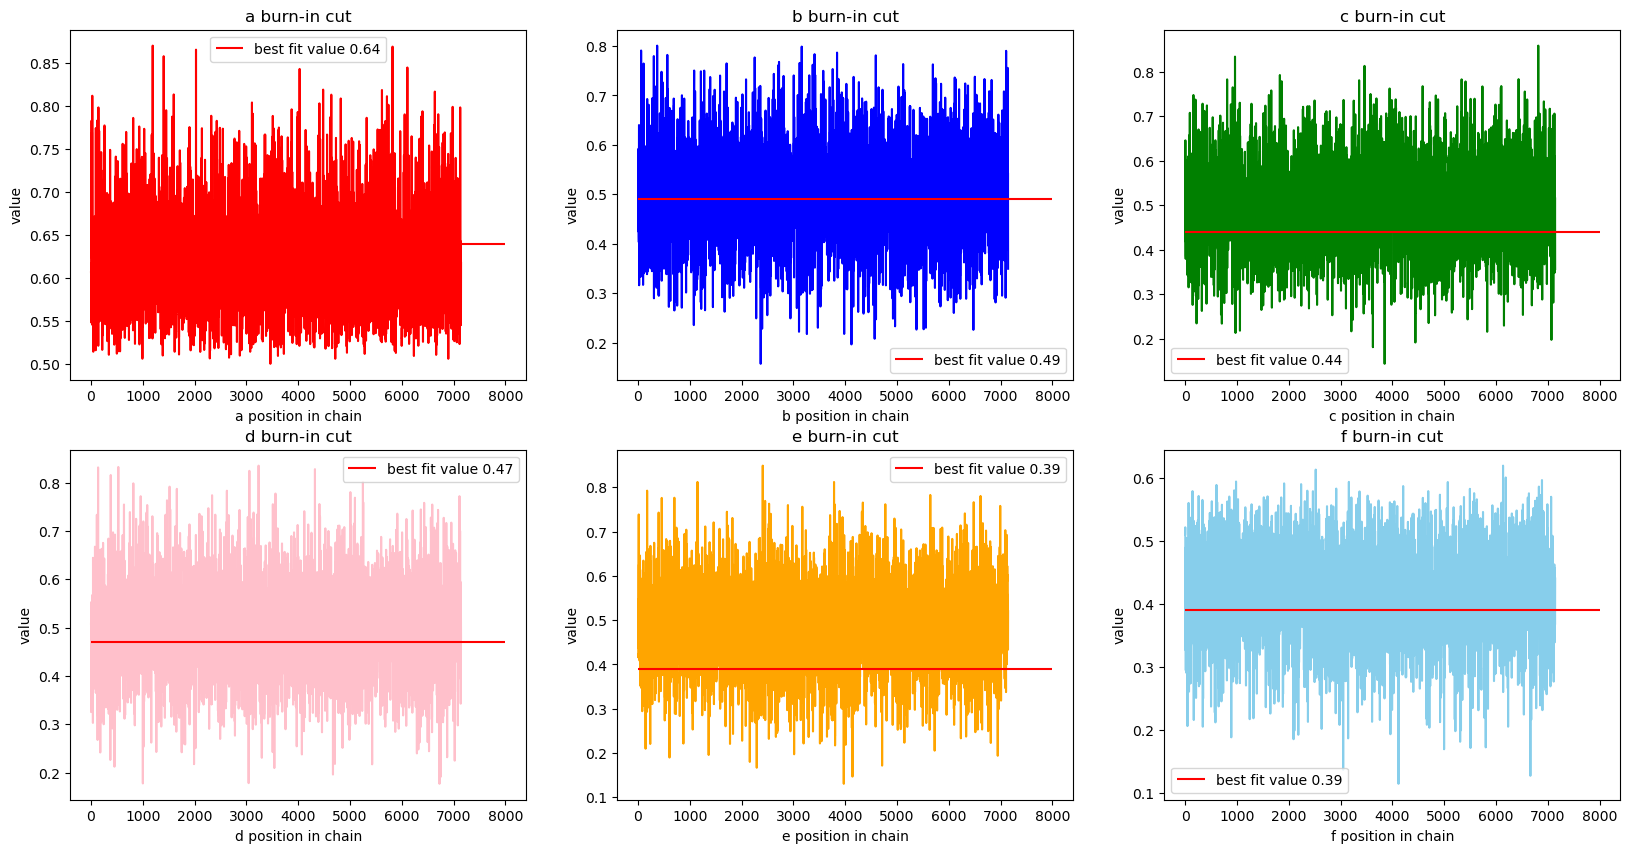

In [308]:

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.plot(a_list, color="r")
plt.hlines(peak_a, xmin=0, xmax=8000, colors="r", label=f"best fit value {peak_a}")
plt.legend()
plt.title('a burn-in cut')
plt.xlabel("a position in chain")
plt.ylabel("value")

plt.subplot(2,3,2)
plt.plot(b_list, color="b")
plt.hlines(peak_b, xmin=0, xmax=8000, colors="r", label=f"best fit value {peak_b}")
plt.legend()
plt.title('b burn-in cut')
plt.xlabel("b position in chain")
plt.ylabel("value")

plt.subplot(2,3,3)
plt.plot(c_list, color="g")
plt.hlines(peak_c, xmin=0, xmax=8000, colors="r", label=f"best fit value {peak_c}")
plt.legend()
plt.title('c burn-in cut')
plt.xlabel("c position in chain")
plt.ylabel("value")

plt.subplot(2,3,4)
plt.plot(d_list, color="pink")
plt.hlines(peak_d, xmin=0, xmax=8000, colors="r", label=f"best fit value {peak_d}")
plt.legend()
plt.title('d burn-in cut')
plt.xlabel("d position in chain")
plt.ylabel("value")

plt.subplot(2,3,5)
plt.plot(e_list, color="orange")
plt.hlines(peak_e, xmin=0, xmax=8000, colors="r", label=f"best fit value {peak_e}")
plt.legend()
plt.title('e burn-in cut')
plt.xlabel("e position in chain")
plt.ylabel("value")

plt.subplot(2,3,6)
plt.plot(f_list, color="skyblue")
plt.hlines(peak_f, xmin=0, xmax=8000, colors="r", label=f"best fit value {peak_f}")
plt.legend()
plt.title('f burn-in cut')
plt.xlabel("f position in chain")
plt.ylabel("value")

plt.show()